<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Импортируем необходимые библиотеки
import pandas as pd  # библиотека для работы с таблицами данных
import seaborn as sns  # библиотека для визуализации данных
import matplotlib.pyplot as plt  # базовая библиотека для построения графиков
from sklearn.preprocessing import StandardScaler  # класс для нормализации признаков
from sklearn.decomposition import PCA  # класс для анализа главных компонент
from sklearn.model_selection import train_test_split  # модуль для разделения датасета на тренировочную и тестовую части
from sklearn.naive_bayes import GaussianNB  # классификатор Байеса Гауссиана
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # метрики оценки модели

In [4]:
# Читаем файл CSV и сохраняем его в переменную data
data = pd.read_csv('/content/wine.csv')

# Просматриваем первые пять строк таблицы для ознакомления с данными
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Узнаем размеры нашей таблицы (строки, столбцы)
data.shape

(178, 14)

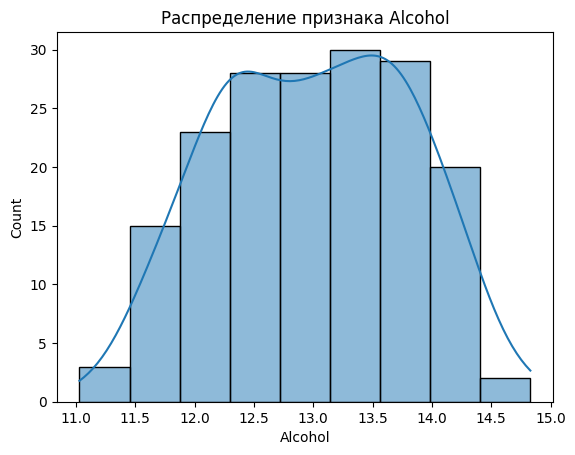

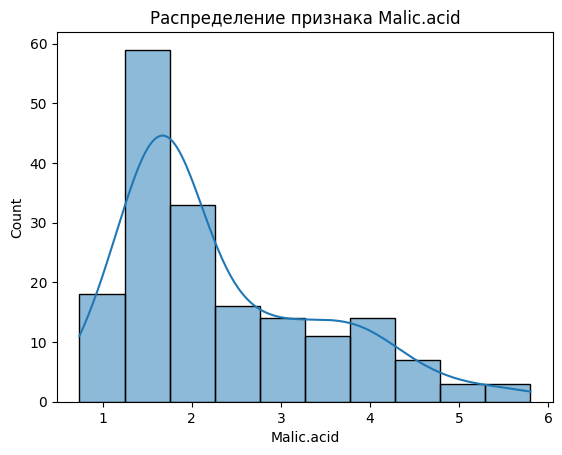

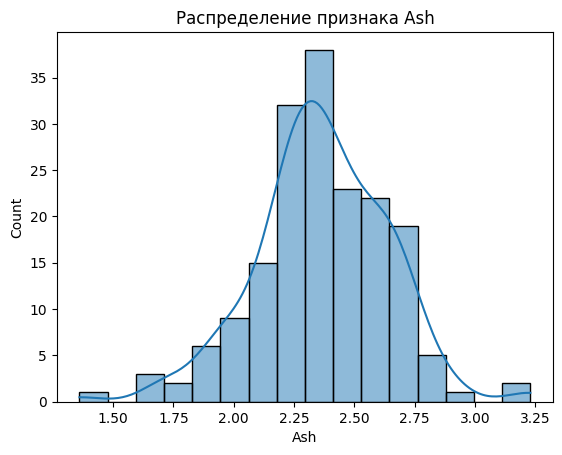

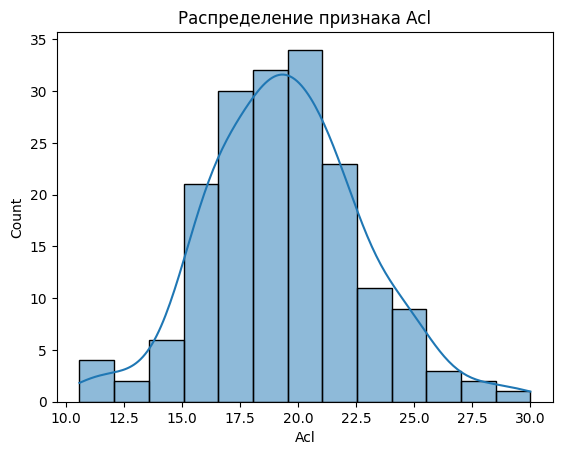

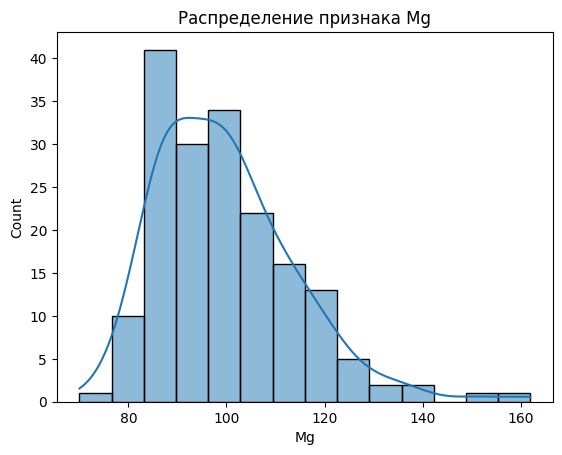

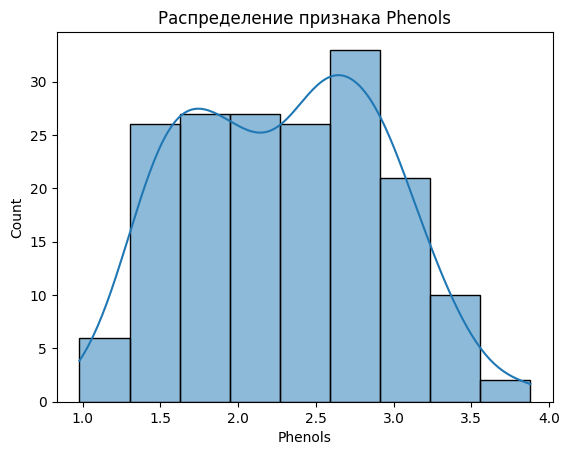

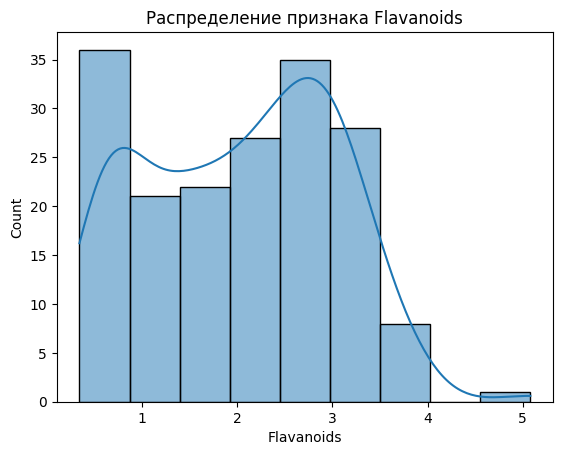

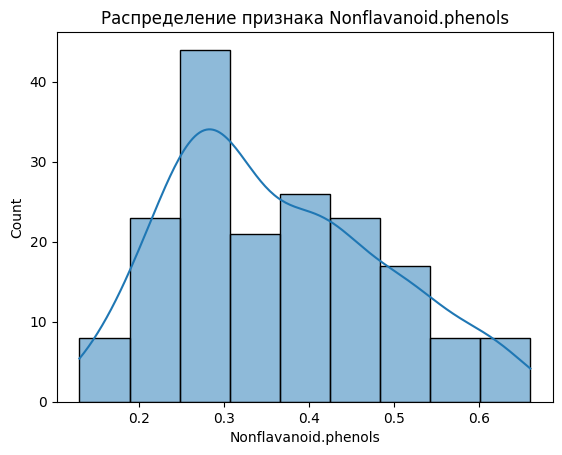

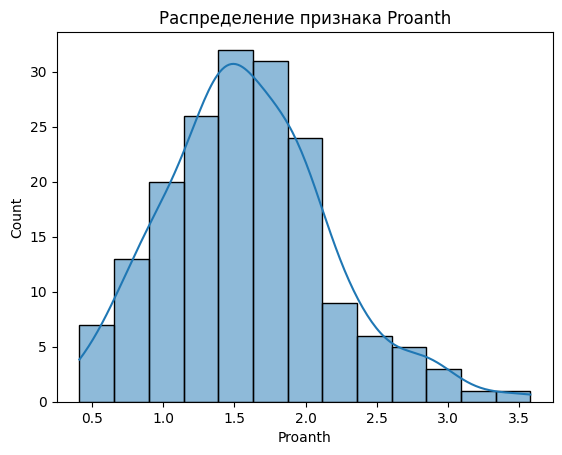

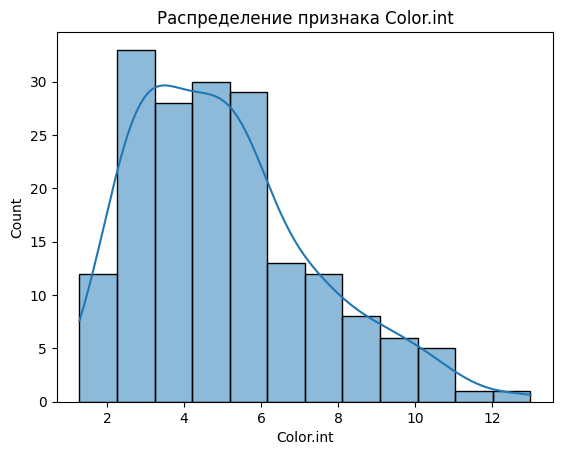

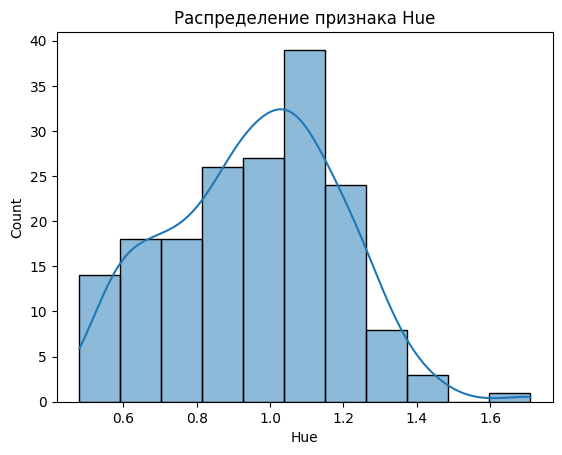

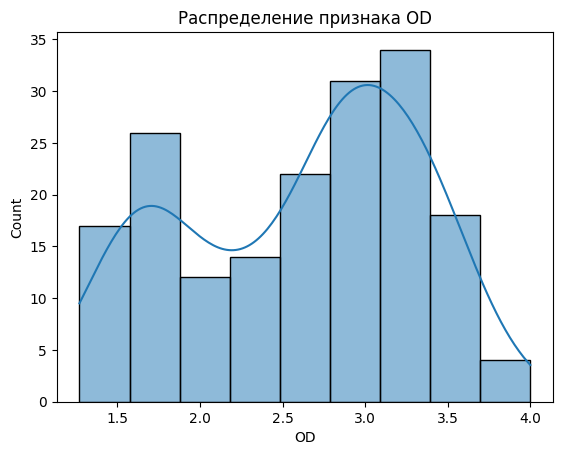

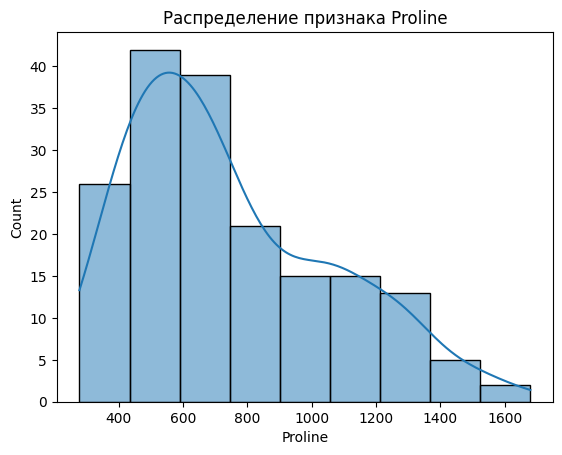

In [6]:
# Строим гистограммы распределения для каждого признака (кроме первого столбца)
for feature in data.columns[1:]:  # начинаем цикл со второго столбца
    sns.histplot(data=data, x=feature, kde=True)  # строим график плотности распределения
    plt.title(f'Распределение признака {feature}')  # задаем заголовок графика
    plt.show()  # показываем построенный график

In [7]:
print('Пропущенные значения:\n', data.isnull().sum())

Пропущенные значения:
 Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


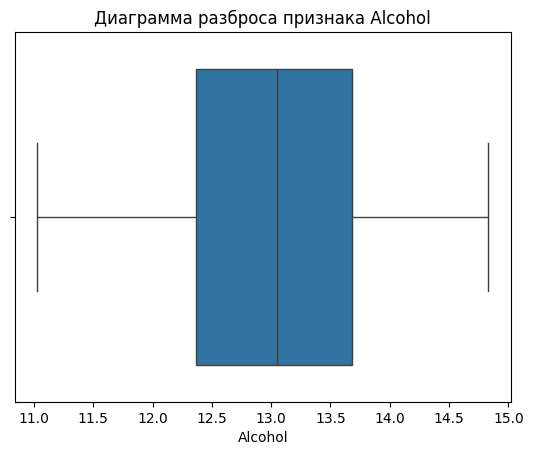

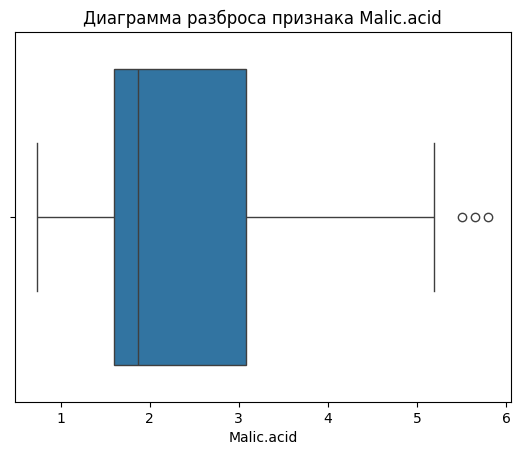

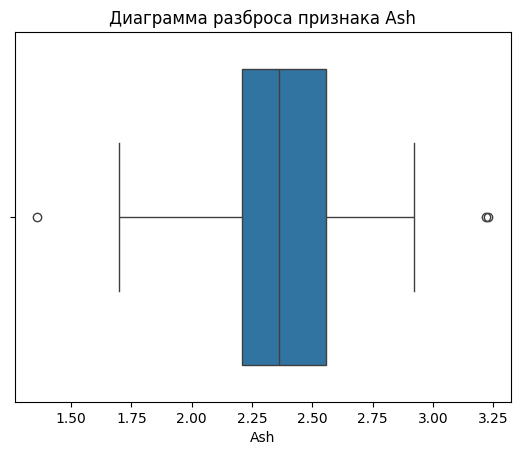

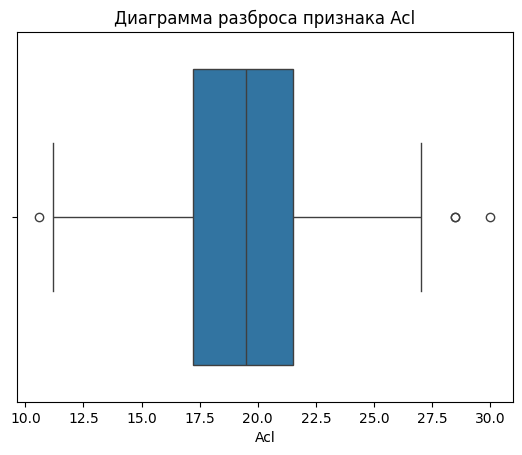

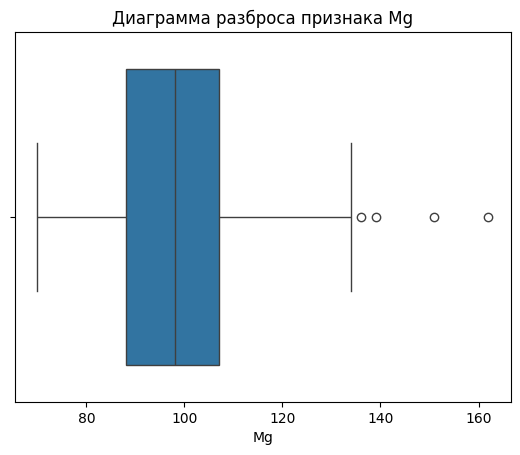

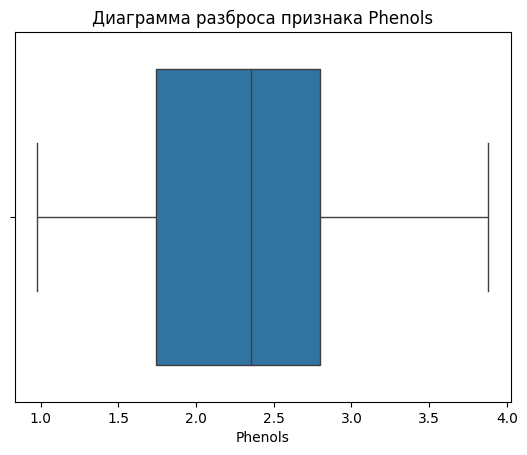

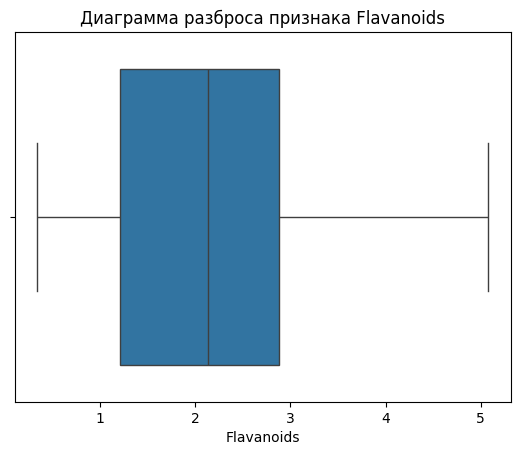

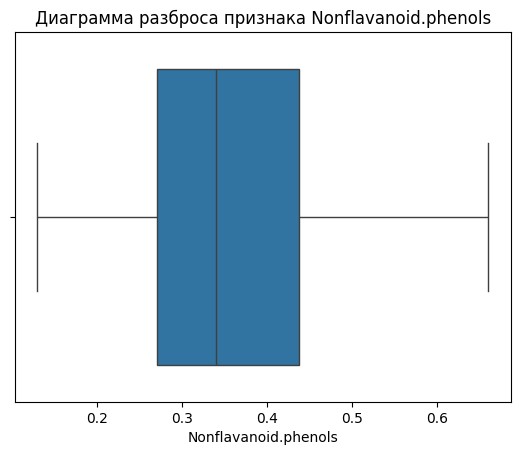

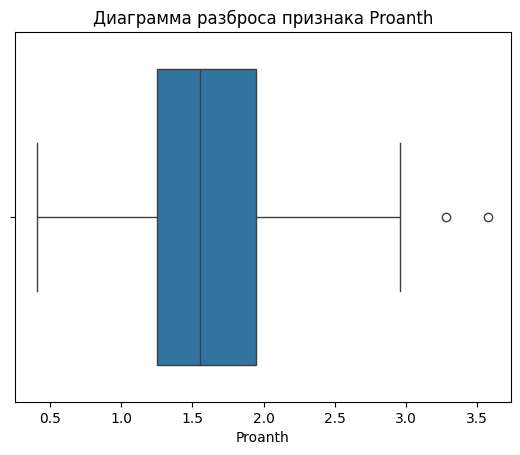

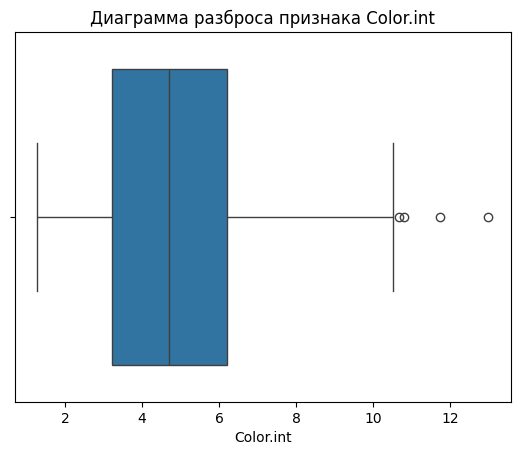

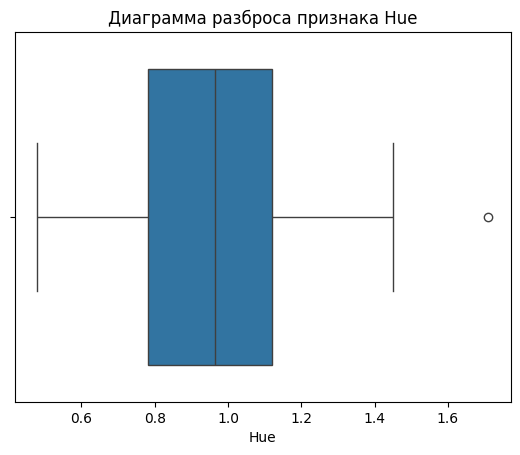

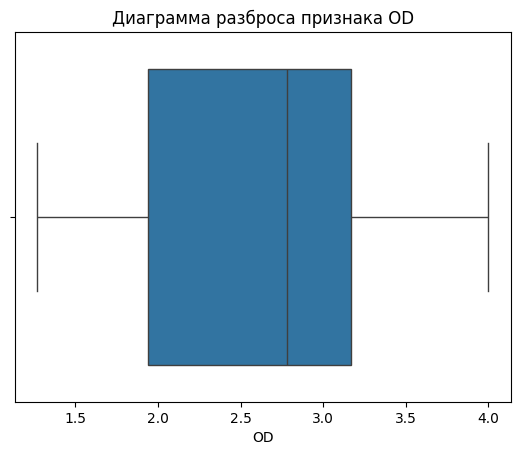

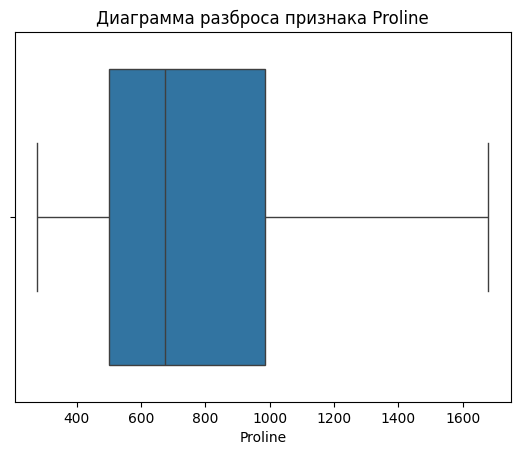

In [8]:
# Теперь рисуем диаграмму boxplot для каждого признака
for feature in data.columns[1:]:  # снова проходим циклом по признакам
    sns.boxplot(data=data, x=feature)  # отображаем boxplot-диаграмму
    plt.title(f'Диаграмма разброса признака {feature}')  # подписываем название графика
    plt.show()  # показываем график

In [9]:
# Разделяем наши признаки (features) и целевую переменную (target)
X = data.drop(['Wine'], axis=1)  # исключаем первый столбец ("Wine")
y = data['Wine']  # выделяем целевой столбец "Wine"

In [10]:
# Нормализуем данные с помощью стандартного масштабирования
scaler = StandardScaler()  # создаем экземпляр класса StandardScaler
X_scaled = scaler.fit_transform(X)  # нормализуем признаки

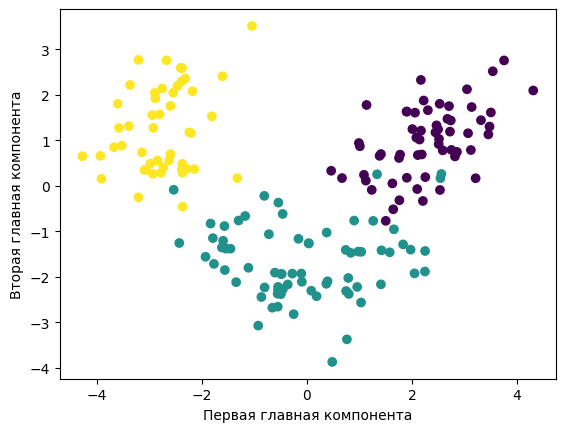

In [11]:
# Используем метод главных компонент (PCA) для снижения размерности до 2-х компонентов
pca = PCA(n_components=2)  # создадим объект PCA с двумя главными компонентами
X_pca = pca.fit_transform(X_scaled)  # применим PCA к нормализованным данным

# Строим график рассеяния точек, используя две главные компоненты
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)  # точки раскрашены цветами классов
plt.xlabel('Первая главная компонента')  # подпись оси X
plt.ylabel('Вторая главная компонента')  # подпись оси Y
plt.show()  # показываем график

In [12]:
# Разделяем датасет на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # тестовая выборка занимает 20%

# Проверяем размеры полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [13]:
# Обучаем простой классификатор Байеса (Gaussian Naive Bayes)
clf = GaussianNB()  # создаем экземпляр классификатора
clf.fit(X_train, y_train)  # обучаем модель на тренировочных данных

GaussianNB()

In [14]:
# Прогнозируем классы на тестовых данных
y_predict = clf.predict(X_test)

In [15]:
# Оцениваем качество классификации
accuracy = accuracy_score(y_true=y_test, y_pred=y_predict)  # точность
precision = precision_score(y_true=y_test, y_pred=y_predict, average='macro')  # точность (средняя макропрецизия)
recall = recall_score(y_true=y_test, y_pred=y_predict, average='macro')  # полноту (средняя макро-полнота)
f1 = f1_score(y_true=y_test, y_pred=y_predict, average='macro')  # F1-метрика (средняя макро-F1)

# Выводим результаты оценки качества модели
print(f"Точность (Accuracy): {accuracy:.4f}")
print(f"Прецизионность (Precision): {precision:.4f}")
print(f"Полный охват (Recall): {recall:.4f}")
print(f"F1-оценка (F1 Score): {f1:.4f}")

Точность (Accuracy): 1.0000
Прецизионность (Precision): 1.0000
Полный охват (Recall): 1.0000
F1-оценка (F1 Score): 1.0000
